## RCROPS Data Analysis

### Gender Distribution
- Gender representation (Number of male and female farmers in the data)
- Number of submissions (per gender)
- Number of submissions per crop (per gender)
- Number of submissions per region (per gender)

### Libraries Setup

In [160]:
import os
import numpy as np
import pandas as pd

#Pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saving figures
PROJECT_ROOT_DIR = "."
ASPECT = "gender"
FIGURES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", ASPECT)
os.makedirs(FIGURES_PATH, exist_ok=True)

def save_figure(fig_name, tight_layout=True, extension="png", resolution=300):
    """
        Saves plotted figures to a set directory.
    """
    path = os.path.join(FIGURES_PATH, fig_name + "." + extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Data Loading

In [161]:
def load_data(file_name, data_path="data"):
    """
        Loads data given the file name.
    """
    file_path = os.path.join(data_path,file_name)
    return pd.read_csv(file_path)

In [162]:
# Data Loading
farmers_data = load_data("farmers_data.csv") # farmers data
beans_data   = load_data("beans_data.csv")   # beans data
maize_data   = load_data("maize_data.csv")   # maize data
cassava_data = load_data("cassava_data.csv") # cassava data

In [163]:
farmers_data.head()

,Unnamed: 0,Farmer_ID,Gender,District,SubCounty,County/Village
0,0,farmer_26595,Female,Kamuli,NaN,NaN
1,1,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera
2,2,farmer_05315,Male,Luweero,Katikamu,Katikamu
3,3,farmer_45092,Male,Nakasongola,Nakasongola Town Council,Sungira
4,4,farmer_64194,Male,Nakasongola,Kalungi,Kabandi


In [164]:
beans_data.head()

,Unnamed: 0,FARMER_ID,_CREATION_DATE,_LAST_UPDATE_DATE,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,BEAN_DATA_END_TIME,BEAN_DATA_BEAN_VARIETY,BEAN_DATA_BEAN_IMAGE_GPS_LNG,BEAN_DATA_BEAN_IMAGE_GPS_ALT,BEAN_DATA_IMAGE_CLASS,BEAN_DATA_BEAN_COMMENT,BEAN_DATA_BEAN_IMAGE_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_DATA_BEAN_IMAGE_GPS_LAT,BEAN_DATA_START_TIME
0,0,farmer_99268,2019-09-23 13:09:42.299,2019-09-23 13:09:42.299,1,2019-09-23 13:09:42.293,2019-09-23 13:09:42.293,2019-09-23 12:57:58.117,NaN,32.625314,1146.0,als,Commlon bacteria blight,7.300,2019-09-23 00:00:00.000,0.521535,2019-09-23 12:55:59.742
1,1,farmer_99268,2019-10-09 19:33:39.698,2019-10-09 19:33:39.698,0,2019-10-09 19:33:39.684,NaN,2019-10-09 10:46:53.560,Yellow,31.705838,1265.1,other,Black small insects,7.338,2019-10-05 00:00:00.000,-0.380002,2019-10-05 15:51:59.821
2,2,farmer_99268,2019-10-09 19:36:42.284,2019-10-09 19:36:42.284,1,2019-10-09 19:36:42.277,2019-10-09 19:36:42.277,2019-10-07 15:15:01.670,Yellow,31.705845,1258.1,other,Brown patches,7.366,2019-10-07 00:00:00.000,-0.380074,2019-10-07 15:14:06.300
3,3,farmer_99268,2019-10-09 19:37:11.540,2019-10-09 19:37:11.540,1,2019-10-09 19:37:11.534,2019-10-09 19:37:11.534,2019-10-09 10:49:48.606,Yellow,31.705812,1255.4,other,Whole plant has yellow leaves,7.300,2019-10-07 00:00:00.000,-0.380017,2019-10-07 15:17:07.527
4,4,farmer_99268,2019-10-09 19:37:37.865,2019-10-09 19:37:37.865,1,2019-10-09 19:37:37.859,2019-10-09 19:37:37.859,2019-10-07 15:21:39.422,Yellow,31.705854,1252.7,other,Yellow and brown leaves,7.300,2019-10-07 00:00:00.000,-0.379977,2019-10-07 15:20:30.972


In [165]:
cassava_data.head()

,Unnamed: 0,FARMER_ID,_CREATION_DATE,_LAST_UPDATE_DATE,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,CASSAVA_DATA_END_TIME,CASSAVA_DATA_CASSAVA_IMAGE_CLASS,CASSAVA_DATA_START_TIME,CASSAVA_DATA_CASSAVA_COMMENT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC
0,0,farmer_43804,2019-09-23 13:08:04,2019-09-23 13:08:04,1,2019-09-23 13:08:04,2019-09-23 13:08:04,2019-09-23 12:21:17,cmd,2019-09-23 12:18:46,This plant was planted when it was sick,0.000000,32.624897,0.521737,2019-09-23 00:00:00,92.900
1,1,farmer_43804,2019-09-23 13:20:51,2019-09-23 13:20:51,1,2019-09-23 13:20:51,2019-09-23 13:20:51,2019-09-23 12:25:23,cbb,2019-09-23 12:23:23,The plant only had bbd,1136.199951,32.625030,0.521581,2019-09-23 00:00:00,97.296
2,2,farmer_43804,2019-09-26 04:21:28,2019-09-26 04:21:28,1,2019-09-26 04:21:28,2019-09-26 04:21:28,2019-09-23 12:23:17,cbsd,2019-09-23 12:21:23,This plant has brown strike,0.000000,32.626620,0.521104,2019-09-23 00:00:00,64.099
3,3,farmer_43804,2019-09-26 04:21:40,2019-09-26 04:21:40,1,2019-09-26 04:21:40,2019-09-26 04:21:40,2019-09-23 12:26:52,other,2019-09-23 12:25:35,Souit molls,0.000000,32.621843,0.533153,2019-09-23 00:00:00,2911.000
4,4,farmer_43804,2019-09-26 04:21:58,2019-09-26 04:21:58,1,2019-09-26 04:21:58,2019-09-26 04:21:58,2019-09-23 12:28:09,healthy,2019-09-23 12:27:14,This is a healthy planty,0.000000,32.621843,0.533153,2019-09-23 00:00:00,2911.000


In [166]:
maize_data.head()

,Unnamed: 0,FARMER_ID,_CREATION_DATE,_LAST_UPDATE_DATE,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,MAIZE_DATA_MAIZE_IMAGE_CLASS,MAIZE_DATA_SUBMISSION_TIME_RAW,MAIZE_DATA_START_TIME_RAW,MAIZE_DATA_SUBMISSION_TIME,MAIZE_DATA_MAIZE_IMAGE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_MAIZE_COMMENT,MAIZE_DATA_MAIZE_IMAGE_GPS_LAT,MAIZE_DATA_MAIZE_IMAGE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_DATA_MAIZE_IMAGE_GPS_LNG
0,0,farmer_99268,2019-09-23 13:09:26.402000,2019-09-23 13:09:26.402000,1,2019-09-23 13:09:26.387000,2019-09-23 13:09:26.387000,faw,2019-09-23,2019-09-23T15:42:48.673+03,2019-09-23 00:00:00,1150.7,2019-09-23 12:44:28.381000,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.3,2019-09-23 12:42:48.673000,32.625263
1,1,farmer_99268,2019-10-05 04:38:02.817000,2019-10-05 04:38:02.817000,1,2019-10-05 04:38:02.806000,2019-10-05 04:38:02.806000,dsd_lf,2019-10-03,2019-10-03T00:55:50.046+03,2019-10-03 00:00:00,1263.5,2019-10-04 20:45:26.816000,2019-10-04T23:45:26.816+03,Whitesh patches,-0.379987,7.3,2019-10-02 21:55:50.046000,31.705856
2,2,farmer_99268,2019-10-05 04:38:12.526000,2019-10-05 04:38:12.526000,1,2019-10-05 04:38:12.514000,2019-10-05 04:38:12.514000,dsd_lf,2019-10-03,2019-10-03T07:55:18.218+03,2019-10-03 00:00:00,1263.5,2019-10-03 04:56:03.192000,2019-10-03T07:56:03.192+03,Whitesh patches,-0.380017,7.3,2019-10-03 04:55:18.218000,31.705866
3,3,farmer_99268,2019-10-05 04:38:23.439000,2019-10-05 04:38:23.439000,1,2019-10-05 04:38:23.434000,2019-10-05 04:38:23.434000,faw,2019-10-03,2019-10-03T07:56:16.285+03,2019-10-03 00:00:00,1263.5,2019-10-03 04:58:05.185000,2019-10-03T07:58:05.185+03,Shoot and leaves are affected by the disease,-0.380051,7.3,2019-10-03 04:56:16.285000,31.705885
4,4,farmer_99268,2019-10-05 04:38:34.168000,2019-10-05 04:38:34.168000,1,2019-10-05 04:38:34.162000,2019-10-05 04:38:34.162000,faw,2019-10-03,2019-10-03T07:58:53.574+03,2019-10-03 00:00:00,1263.1,2019-10-03 04:59:38.205000,2019-10-03T07:59:38.205+03,Shoot and leaves are affected by the disease,-0.379993,7.3,2019-10-03 04:58:53.574000,31.705823


### Data Cleaning & Preprocessing

Preparing the data for analysis.

In [167]:
# Number of farmers in dataset
farmers_data.shape

(130, 6)

In [168]:
# Number of unique farmers
farmers_data.Farmer_ID.nunique()

127

In [169]:
# Non-unique farmer ID(s)
xx = farmers_data.Farmer_ID.value_counts()
yy = xx > 1 # Farmer_IDs that appear more than once.
xx[yy]

farmer_70173    2
farmer_41600    2
farmer_94435    2
Name: Farmer_ID, dtype: int64

In [154]:
duplicated_ids = xx[yy].index.to_list() # index to list
duplicated_ids

['farmer_70173', 'farmer_41600', 'farmer_94435']

In [195]:
x = farmers_data['Farmer_ID'] == 'farmer_70173'
y = farmers_data['Farmer_ID'] == 'farmer_41600'
z = farmers_data['Farmer_ID'] == 'farmer_94435'

df1 = pd.DataFrame([x, y, z])
farmers_data.loc[list(df1.any()),] # A look at the duplicate farmer IDs

,Unnamed: 0,Farmer_ID,Gender,District,SubCounty,County/Village
28,28,farmer_94435,Male,Mayuge,Kigandaalo,Naijeria
29,29,farmer_94435,Male,Mayuge,Kigandaalo,Bugondo
80,90,farmer_41600,Male,NaN,NaN,NaN
83,93,farmer_41600,Male,Amolatar,NaN,NaN
95,106,farmer_70173,Male,NaN,NaN,NaN
97,116,farmer_70173,Male,Oyam,NaN,NaN


Cleaning Criteria:
- Drop duplicates with least information, the first ones.

In [141]:
farmers_data.columns

Index(['Unnamed: 0', 'Farmer_ID', 'Gender', 'District', 'SubCounty',
       'County/Village'],
      dtype='object')

In [170]:
updated_farmers_data = farmers_data.drop_duplicates('Farmer_ID', keep='last')

In [171]:
updated_farmers_data.Farmer_ID.nunique()

127

In [213]:
xxx = updated_farmers_data.Farmer_ID.value_counts()
yyy = xxx > 1 # Farmer_IDs that appear more than once.
xxx[yyy] # All IDs are unique

Series([], Name: Farmer_ID, dtype: int64)

In [197]:
a = updated_farmers_data['Farmer_ID'] == 'farmer_70173'
b = updated_farmers_data['Farmer_ID'] == 'farmer_41600'
c = updated_farmers_data['Farmer_ID'] == 'farmer_94435'

df2 = pd.DataFrame([a, b, c])
updated_farmers_data.loc[list(df2.any()),] # kept the last entries

,Unnamed: 0,Farmer_ID,Gender,District,SubCounty,County/Village
29,29,farmer_94435,Male,Mayuge,Kigandaalo,Bugondo
83,93,farmer_41600,Male,Amolatar,NaN,NaN
97,116,farmer_70173,Male,Oyam,NaN,NaN


In [198]:
# Drop Unnamed: 0 column
for dataframe in ((updated_farmers_data, cassava_data, maize_data, beans_data)):
    dataframe.drop("Unnamed: 0", axis=1, inplace=True)

/home/bomera/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [199]:
updated_farmers_data.columns

Index(['Farmer_ID', 'Gender', 'District', 'SubCounty', 'County/Village'], dtype='object')

In [200]:
cassava_data.columns

Index(['FARMER_ID', '_CREATION_DATE', '_LAST_UPDATE_DATE', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_DATA_CASSAVA_IMAGE_CLASS', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_CASSAVA_COMMENT', 'CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT',
       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG',
       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT', 'CASSAVA_DATA_SUBMISSION_TIME',
       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC'],
      dtype='object')

In [201]:
beans_data.columns

Index(['FARMER_ID', '_CREATION_DATE', '_LAST_UPDATE_DATE', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_DATA_BEAN_VARIETY', 'BEAN_DATA_BEAN_IMAGE_GPS_LNG',
       'BEAN_DATA_BEAN_IMAGE_GPS_ALT', 'BEAN_DATA_IMAGE_CLASS',
       'BEAN_DATA_BEAN_COMMENT', 'BEAN_DATA_BEAN_IMAGE_GPS_ACC',
       'BEAN_DATA_SUBMISSION_TIME', 'BEAN_DATA_BEAN_IMAGE_GPS_LAT',
       'BEAN_DATA_START_TIME'],
      dtype='object')

In [202]:
cassava_data.shape

(53248, 15)

In [203]:
beans_data.shape

(10854, 16)

In [204]:
maize_data.shape

(51569, 18)

In [205]:
# Series Data containing only farmer ID data
cassava_series, beans_series, maize_series = cassava_data.FARMER_ID, beans_data.FARMER_ID, maize_data.FARMER_ID
# cassava_series

# concatenation
combined_submissions = pd.concat([cassava_series, beans_series, maize_series], ignore_index=True)
combined_submissions = pd.DataFrame(combined_submissions)

In [206]:
combined_submissions.head()

,FARMER_ID
0,farmer_43804
1,farmer_43804
2,farmer_43804
3,farmer_43804
4,farmer_43804


In [207]:
combined_submissions.shape

(115671, 1)

In [208]:
# Returns all records with NaN for missing matches
combined_data_outer = pd.merge(updated_farmers_data, combined_submissions, 
                         left_on="Farmer_ID", right_on="FARMER_ID", 
                         how="outer")
combined_data_outer.head()

,Farmer_ID,Gender,District,SubCounty,County/Village,FARMER_ID
0,farmer_26595,Female,Kamuli,NaN,NaN,NaN
1,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867
2,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867
3,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867
4,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867


In [209]:
# Returns submissions with farmer IDs in both datasets.
combined_data_inner = pd.merge(updated_farmers_data, combined_submissions,
                               left_on="Farmer_ID", right_on="FARMER_ID", 
                               how="inner")
combined_data_inner.head()

,Farmer_ID,Gender,District,SubCounty,County/Village,FARMER_ID
0,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867
1,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867
2,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867
3,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867
4,farmer_85867,Female,Nakasongola,Nabiswera,Nabiswera,farmer_85867


In [216]:
# Farmer IDs missing in either the farmers or the submissions datasets
combined_data_outer.shape[0] - combined_data_inner.shape[0] 

32

In [214]:
submissions_missing_ids = combined_data_outer.loc[combined_data_outer.Farmer_ID.isnull(), "FARMER_ID"]
submissions_missing_ids # -> None

Series([], Name: FARMER_ID, dtype: object)

In [218]:
farmers_without_submissions = combined_data_outer.loc[combined_data_outer.FARMER_ID.isnull(), "Farmer_ID"]
len(farmers_without_submissions) # -> 32 farmers

32

Cleaning Summary:
-  **3** duplicate farmer ID entries removed from the farmers datasets.
- unnamed: 0 column dropped
- **32** farmers in the dataset have no submissions.

## 1. Gender representation (Number of male and female farmers in the data)

In [220]:
updated_farmers_data.Gender.value_counts()

Male      84
Female    43
Name: Gender, dtype: int64

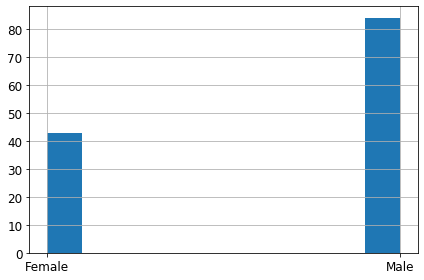

In [221]:
updated_farmers_data.Gender.hist()
save_figure("Gender_Distribution_Histogram")

In [223]:
updated_farmers_data.Gender.value_counts() / len(updated_farmers_data) * 100

Male      66.141732
Female    33.858268
Name: Gender, dtype: float64

Gender Distribution Summary:
- **84** male, **43** female

### 2. Number of submissions (per gender)